### Fashion-MNIST

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

100%|█████████████████████████████████████████████████████████████████▉| 26419200/26421880 [01:21<00:00, 387384.72it/s]

Extracting ./data/F-MNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/F-MNIST\FashionMNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                        | 0/29515 [00:00<?, ?it/s]
32768it [00:00, 168396.25it/s]                                                                                         

Extracting ./data/F-MNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/F-MNIST\FashionMNIST\raw



0it [00:00, ?it/s]
 74%|██████████████████████████████████████████████████▎                 | 3268608/4422102 [00:10<00:05, 220314.68it/s]


 99%|███████████████████████████████████████████████████████████████████▍| 4382720/4422102 [00:13<00:00, 439073.74it/s]

Extracting ./data/F-MNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/F-MNIST\FashionMNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                         | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 71027.88it/s]                                                                                           

Extracting ./data/F-MNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/F-MNIST\FashionMNIST\raw
Processing...
Done!


26427392it [01:40, 387384.72it/s]                                                                                      
4423680it [00:26, 439073.74it/s]                                                                                       

In [3]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)

In [6]:
len(train_set)

60000

In [7]:
train_set.train_labels

C:\Users\Mir\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
train_set.train_labels.bincount()

C:\Users\Mir\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [9]:
sample = next(iter(train_set))

In [10]:
image, label = sample

label: 9


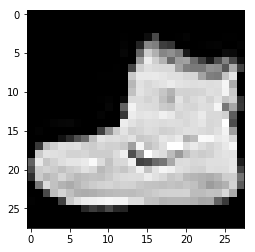

In [13]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [14]:
batch = next(iter(train_loader))

In [15]:
images, labels = batch

In [16]:
images.shape

torch.Size([10, 1, 28, 28])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


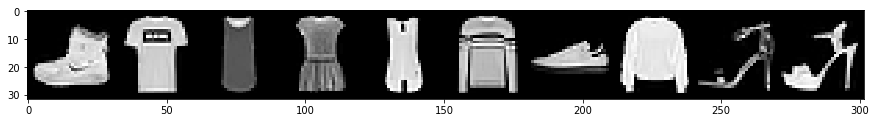

In [17]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [18]:
import torch.nn as nn

### Network

In [27]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
        def forward(self, t):
            
            # (1) Input layer
            t = t
            
            # (2) hidden conv layer
            t = self.conv1(t)
            t = F.relu()
            t = F.max_pool2d(t, kernel_size=2, stride=2)
            
            # (3) hidden conv layer
            t = self.conv2(t)
            t = F.relu(t)
            t = F.max_pool2d(t, kernel_size=2, stride=2)
            
            # (4) hidden linear layer
            t = t.reshape(-1, 12 * 4 * 4)
            t = self.fc1(t)
            t = F.relu(t)
            
            # (5) hidden linear layer
            t = self.fc2(t)
            t = F.relu(t)
            
            # (6) output layer
            t = self.out(t)
            t = F.softmax(t, dim=1)
            
            return t

In [21]:
network = Network()

In [22]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [23]:
network.conv1.weight

Parameter containing:
tensor([[[[-4.4340e-02, -9.5982e-02,  1.5243e-01,  8.8273e-02,  4.2101e-02],
          [-8.0587e-02, -1.8458e-01,  1.6426e-01, -1.5302e-01,  4.2759e-02],
          [-5.0627e-02, -1.2088e-01,  1.2653e-01,  9.4235e-02,  1.0481e-01],
          [ 6.9453e-02, -1.8506e-01,  1.5989e-01,  6.2367e-02, -4.6069e-02],
          [ 1.4446e-01, -3.0072e-02, -1.8757e-01,  1.7612e-01, -1.0024e-01]]],


        [[[-1.4695e-03,  1.6454e-01,  9.1133e-02,  3.2570e-02, -1.3863e-01],
          [-1.1292e-01,  1.9511e-01,  1.7695e-01, -9.7631e-02, -1.1508e-01],
          [-1.9616e-03, -1.5721e-01,  4.4956e-02,  1.6503e-01,  6.7812e-02],
          [-1.4019e-01, -1.8665e-01, -1.0329e-01, -1.6609e-01, -9.9711e-02],
          [ 1.0662e-01, -5.2030e-02, -1.4119e-03,  1.4584e-01,  1.7586e-04]]],


        [[[-1.4248e-01, -4.2374e-02, -1.4887e-01,  1.1088e-01, -3.5609e-02],
          [-6.8686e-02,  1.4906e-01,  1.2948e-01,  1.3683e-01, -7.0123e-03],
          [ 6.4203e-03,  3.9646e-02,  6.7659e-

In [24]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

### Parameters

In [26]:
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])
